In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on    employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [2]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

# exploratory data analysis

~ finding how many people left and Retained: Office 

In [3]:
df["left"].shape

(14999,)

In [4]:
left  = df[df["left"]==1]
left.shape

(3571, 10)

In [5]:
retained = df[df["left"]==0]
retained.shape

(11428, 10)

# Impact of salary on employee retention:

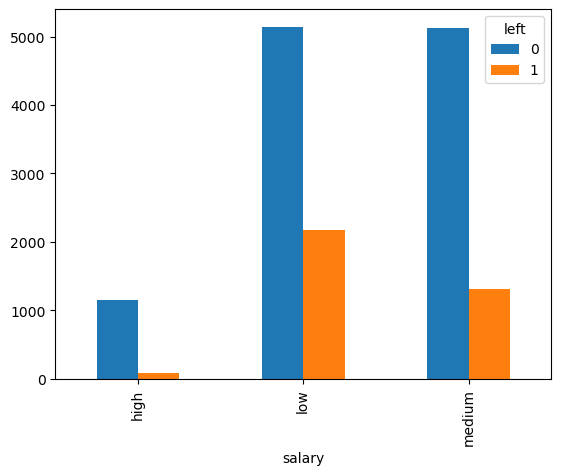

In [6]:
pd.crosstab(df.salary,df.left).plot(kind='bar')
plt.show()

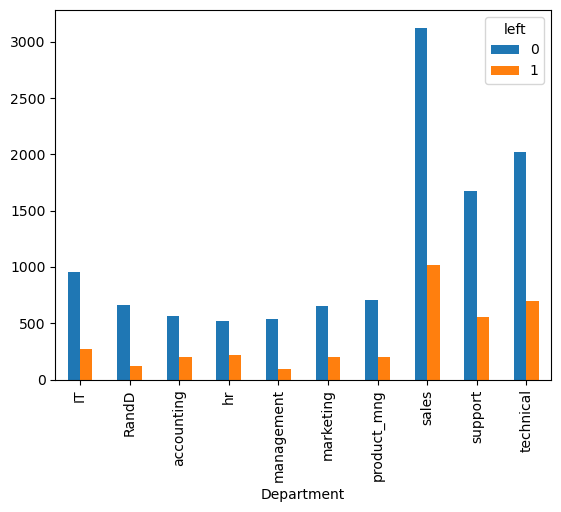

In [7]:
pd.crosstab(df.Department,df.left).plot(kind='bar')
plt.show()

In [8]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

satisfaction_level  average_montly_hours  promotion_last_5years  salary
0                0.38                   157                      0     low
1                0.80                   262                      0  medium
2                0.11                   272                      0  medium
3                0.72                   223                      0     low
4                0.37                   159                      0     low

Tackle salary dummy variable

Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that. Check my one hot encoding tutorial to understand purpose behind dummy variables.

In [23]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")
salary_dummies = salary_dummies.astype(int)

df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')
df_with_dummies.head()

satisfaction_level  average_montly_hours  promotion_last_5years  salary  \
0                0.38                   157                      0     low   
1                0.80                   262                      0  medium   
2                0.11                   272                      0  medium   
3                0.72                   223                      0     low   
4                0.37                   159                      0     low   

   salary_high  salary_low  salary_medium  
0            0           1              0  
1            0           0              1  
2            0           0              1  
3            0           1              0  
4            0           1              0

In [24]:
df_with_dummies.drop("salary", axis="columns", inplace=True)
df_with_dummies.head()

satisfaction_level  average_montly_hours  promotion_last_5years  salary  \
0                0.38                   157                      0     low   
1                0.80                   262                      0  medium   
2                0.11                   272                      0  medium   
3                0.72                   223                      0     low   
4                0.37                   159                      0     low   

   salary_high  salary_low  salary_medium  
0            0           1              0  
1            0           0              1  
2            0           0              1  
3            0           1              0  
4            0           1              0

In [28]:
X = df_with_dummies
X.head()

satisfaction_level  average_montly_hours  promotion_last_5years  salary  \
0                0.38                   157                      0     low   
1                0.80                   262                      0  medium   
2                0.11                   272                      0  medium   
3                0.72                   223                      0     low   
4                0.37                   159                      0     low   

   salary_high  salary_low  salary_medium  
0            0           1              0  
1            0           0              1  
2            0           0              1  
3            0           1              0  
4            0           1              0

In [39]:
y = df.left

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [43]:
model.fit(X_train, y_train)

LogisticRegression()

In [45]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

Accuracy of the model

In [46]:
model.score(X_test, y_test)

0.7852380952380953

In [ ]:
# datistabdulamin